# Recommendation_System_Project_(e-commerce)

Importing numpy and pandas for data preprocessing

In [1]:
import numpy as np
import pandas as pd

Importing the electronis_rating dataset

In [2]:
df=pd.read_csv("ratings_Electronics.csv",header=None)

In [3]:
df.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


since when we checked the dataset the column name was not assigned, we assign column names

In [4]:
df.columns=["user_id","prod_id","rating","time_stamp"]

Head of a data set

In [5]:
df.head()

,user_id,prod_id,rating,time_stamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


Tail of a dataset

In [6]:
df.tail()

,user_id,prod_id,rating,time_stamp
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
7824481,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200


since the time_stamp column is not necessary and useful in calculations we can drop the column

In [8]:
df=df.drop("time_stamp",axis=1)

In [9]:
df.head()

,user_id,prod_id,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [10]:
df.tail()

,user_id,prod_id,rating
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0
7824478,A322MDK0M89RHN,BT008UKTMW,5.0
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0
7824481,A2G81TMIOIDEQQ,BT008V9J9U,5.0


In [19]:
df_copy=df.copy(deep=True)                         #keeping a copy of the original data

checking the shape of dataset

In [13]:
df.shape

(7824482, 3)

checking the data types of the dataset

In [14]:
df.dtypes

user_id     object
prod_id     object
rating     float64
dtype: object

checking if there is null values in the dataset

In [18]:
df.isnull().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

there are no null values in the dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
user_id    object
prod_id    object
rating     float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


from the description we can see that the maximum rating is 5 and the minimum rating is 1

In [22]:
df["rating"].min()

1.0

In [23]:
df["rating"].max()

5.0

plotiing the histogram of the ratings

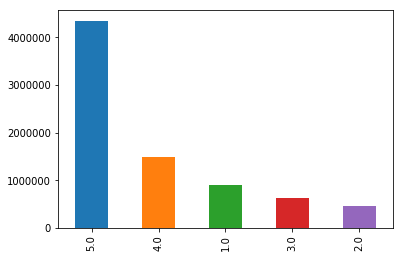

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

df["rating"].value_counts().plot(kind="bar")


we can see that no of product that goes rating 5 is more

In [27]:
df["user_id"].nunique()

4201696

no of unique users os 4201696

In [28]:
df["prod_id"].nunique()

476002

no of unique products is 476002

checking for the most rated users 

In [49]:
most_rated=df.groupby("user_id").size().sort_values(ascending=False)[:10]
most_rated

user_id
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
dtype: int64

we can see above users who have rated the most products

for creating a subset of dataset with the most  users who have given more than 50

In [43]:
counts=df["user_id"].value_counts()

In [45]:
counts.head()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: user_id, dtype: int64

In [46]:
counts.tail()

A3G7XCFY5008M7    1
A2XDWGHWXABUF0    1
A14QJHVRA7EWH8    1
AE8R3YVXO9X81     1
A2YJP4620HETRL    1
Name: user_id, dtype: int64

taking only the users who have rated more than fifty products

In [44]:
df_final=df[df["user_id"].isin(counts[counts>=50].index)]

In [47]:
df_final.head()

,user_id,prod_id,rating
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [48]:
df_final.tail()

,user_id,prod_id,rating
7824426,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0
7824427,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0
7824436,A3AYSYSLHU26U9,B00LI4ZZO8,4.0
7824438,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0
7824444,A2BYV7S1QP2YIG,B00LKG1MC8,5.0


In [34]:
len(df_final)

125871

we can see there are 125871 such rows

In [35]:
df_final["user_id"].nunique()

1540

from the subsetted dataset we have 1540 unique users

In [36]:
df_final["prod_id"].nunique()

48190

from the subsetted dataset we have 48190 unique products

In [37]:
final_ratings_matrix=df_final.pivot(index="user_id",columns="prod_id",values="rating").fillna(0)

In [38]:
final_ratings_matrix.shape

(1540, 48190)

In [39]:
given_ratings=np.count_nonzero(final_ratings_matrix)

In [40]:
possible_ratings=final_ratings_matrix.shape[0]*final_ratings_matrix.shape[1]

In [41]:
density=(given_ratings/possible_ratings)*100
density

0.1696086648358904

In [42]:
final_ratings_matrix.head()

prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Splitting the data for testing and training

In [51]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(df_final,test_size=0.30,random_state=1)
train_data_grouped=train_data.groupby("prod_id").agg({"user_id" : "count"}).reset_index()
train_data_grouped.rename(columns={"user_id":"score"},inplace=True)
train_data_grouped.head()

,prod_id,score
0,0594451647,1
1,0970407998,2
2,0972683275,2
3,1400501466,2
4,1400501520,1


# Popularity Recommendation Model

In [52]:
train_data_sort=train_data_grouped.sort_values(["score","prod_id"],ascending=[0,1])
train_data_sort["rank"]=train_data_sort["score"].rank(ascending=False,method="first")
popularity_recommendation=train_data_sort.head(5)
popularity_recommendation

,prod_id,score,rank
30797,B0088CJT4U,155,1.0
19529,B003ES5ZUU,124,2.0
8601,B000N99BBC,122,3.0
30194,B007WTAJTO,112,4.0
30489,B00829TIEK,100,5.0


function for finding recommendation

In [64]:
def recommend(user_id):
    user_recommendation=popularity_recommendation
    user_recommendation["user_id"]=user_id
    cols=user_recommendation.columns.tolist()
    cols=cols[-1:]+cols[:-1]
    user_recommendation=user_recommendation[cols]
    return user_recommendation

products recommended for different users

In [54]:
find_recom=[15,12,200]
for i in find_recom:
    print("recommendation for user: %d \n "%(i))
    print(recommend(i))

recommendation for user: 15 
 


C:\Users\ajitemmanuel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


       user_id     prod_id  score  rank
30797       15  B0088CJT4U    155   1.0
19529       15  B003ES5ZUU    124   2.0
8601        15  B000N99BBC    122   3.0
30194       15  B007WTAJTO    112   4.0
30489       15  B00829TIEK    100   5.0
recommendation for user: 12 
 
       user_id     prod_id  score  rank
30797       12  B0088CJT4U    155   1.0
19529       12  B003ES5ZUU    124   2.0
8601        12  B000N99BBC    122   3.0
30194       12  B007WTAJTO    112   4.0
30489       12  B00829TIEK    100   5.0
recommendation for user: 200 
 
       user_id     prod_id  score  rank
30797      200  B0088CJT4U    155   1.0
19529      200  B003ES5ZUU    124   2.0
8601       200  B000N99BBC    122   3.0
30194      200  B007WTAJTO    112   4.0
30489      200  B00829TIEK    100   5.0


# Collaborative Filtering Model

In [55]:
df_cf=pd.concat([train_data,test_data]).reset_index()
pivot_df=df_cf.pivot(index="user_id",columns="prod_id",values="rating").fillna(0)
pivot_df.head()

prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
from scipy.sparse.linalg import svds
u,sigma,vt=svds(pivot_df,k=50)
sigma=np.diag(sigma)
all_user_predicted_ratings=np.dot(np.dot(u,sigma),vt)
pred_df=pd.DataFrame(all_user_predicted_ratings,columns=pivot_df.columns)
pred_df.head()

prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.005086,0.002178,0.003668,-0.040843,0.009640,0.006808,0.020659,0.000649,0.020331,0.005633,...,0.000238,-0.061477,0.001214,-0.123433,0.028490,0.016109,0.002855,-0.174568,0.011367,-0.012997
1,0.002286,-0.010898,-0.000724,0.130259,0.007506,-0.003350,0.063711,-0.000674,0.016111,-0.002433,...,-0.000038,0.013766,0.001473,0.025588,-0.042103,0.004251,0.002177,-0.024362,-0.014765,0.038570
2,-0.001655,-0.002675,-0.007355,0.007264,0.005152,-0.003986,-0.003480,0.006961,-0.006606,-0.002719,...,-0.001708,-0.051040,0.000325,-0.054867,0.017870,-0.004996,-0.002426,0.083928,-0.112205,0.005964
3,0.001856,0.011019,-0.005910,-0.014134,0.000179,0.001877,-0.005391,-0.001709,0.004968,0.001402,...,0.000582,-0.009326,-0.000465,-0.048315,0.023302,0.006790,0.003380,0.005460,-0.015263,-0.025996
4,0.001115,-0.002670,0.011018,0.014434,0.010319,0.006002,0.017151,0.003726,0.001404,0.005645,...,0.000207,0.023761,0.000747,-0.019347,-0.012749,0.001026,0.001364,-0.020580,0.011828,0.012770


recommendation function

In [57]:
def recommend_items(userId,pivot_df,pred_df,num_recommendation):
    user_idx=userId-1
    sorted_user_ratings=pivot_df.iloc[user_idx].sort_values(ascending=False)
    sorted_user_predictions=pred_df.iloc[user_idx].sort_values(ascending=False)
    temp=pd.concat([sorted_user_ratings,sorted_user_predictions],axis=1)
    temp.index.name="Recommended Items"
    temp.columns=["user_ratings","user_predictions"]
    temp=temp.loc[temp.user_ratings==0]
    temp=temp.sort_values("user_predictions",ascending=False)
    print("\n Below ar e the recommended item for the user(user_id = {}):\n".format(userId))
    print(temp.head(num_recommendation))

products recommended for different users

In [60]:
userId=100
num_recommendation=5
recommend_items(userId,pivot_df,pred_df,num_recommendation)

C:\Users\ajitemmanuel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """



 Below ar e the recommended item for the user(user_id = 100):

                   user_ratings  user_predictions
Recommended Items                                
B000QUUFRW                  0.0          0.707524
B002V88HFE                  0.0          0.646016
B007WTAJTO                  0.0          0.580565
B002WE6D44                  0.0          0.487400
B000AZ57M6                  0.0          0.484131


In [59]:
userId=13
num_recommendation=5
recommend_items(userId,pivot_df,pred_df,num_recommendation)

C:\Users\ajitemmanuel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """



 Below ar e the recommended item for the user(user_id = 13):

                   user_ratings  user_predictions
Recommended Items                                
B00829TIA4                  0.0          1.375747
B004CLYEDC                  0.0          1.126782
B003CFATT2                  0.0          0.891994
B00HFRWWAM                  0.0          0.891051
B00G4UQ6U8                  0.0          0.890606


# RootMeanSquareError Calculation

In [62]:
rmse_df=pd.concat([final_ratings_matrix.mean(),pred_df.mean()],axis=1)
rmse_df.columns=["avg_actual_rating","avg_predicted_rating"]
rmse_df.head()

,avg_actual_rating,avg_predicted_rating
prod_id,,
0594451647,0.003247,0.001953
0594481813,0.001948,0.002875
0970407998,0.003247,0.003355
0972683275,0.012338,0.010343
1400501466,0.012987,0.004871


In [63]:
RMSE=round((((rmse_df.avg_actual_rating-rmse_df.avg_predicted_rating)**2).mean()**0.5),5)
RMSE

0.00275

root mean square value=0.00275